In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [2]:
# loading full dataset
#df = pd.read_csv("2021_Competition_Training.csv")

In [3]:
#Creating the Humana_Small.csv dataset

#filename = "2021_Competition_Training.csv" 
#n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
#s = n//10  # sample size of 10%
#skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
#df = pd.read_csv(filename, skiprows=skip)


In [4]:
#df.to_csv("Humana_Training_small.csv")

In [5]:
df = pd.read_csv("Humana_Training_small.csv")
info = df.info(verbose = True, show_counts = True)

C:\Users\patri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,9,12,14,17,21,27,29,30,32,34,56,59,63,65,67,76,86,103,125,136,161,175,181,193,210,211,212,216,221,235,248,256,262,286,298,306,307,310,324,335,345,346,354,356) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97484 entries, 0 to 97483
Data columns (total 369 columns):
 #    Column                                                 Non-Null Count  Dtype  
---   ------                                                 --------------  -----  
 0    Unnamed: 0                                             97484 non-null  int64  
 1    Unnamed: 0.1                                           97484 non-null  int64  
 2    ID                                                     97484 non-null  object 
 3    auth_3mth_post_acute_dia                               97484 non-null  object 
 4    rx_gpi2_72_pmpm_cost_6to9m_b4                          97484 non-null  float64
 5    atlas_pct_laccess_child15                              96889 non-null  float64
 6    atlas_recfacpth14                                      97023 non-null  float64
 7    atlas_pct_fmrkt_frveg16                                88612 non-null  float64
 8    atlas_pct_free_lunch14            

In [6]:
# summarize the number of rows with missing values for each column
missing ={}
for i in range(df.shape[1]):
    # count number of rows with missing values
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    perc = round(perc,2)
    
    dtype = df.iloc[:,i].dtype
    
    missing[i] = [df.columns[i], dtype, n_miss, perc]
    



In [7]:
missing_val = pd.DataFrame(missing)
missing_values =missing_val.T
missing_values = missing_values.rename(columns = {0: "Column Name", 1:"dtype", 2: "Number of Missing Values", 3: "Percent Missing Values"})

In [8]:
missing_values.sort_values(by = 'Percent Missing Values', ascending = False).head(35)


,Column Name,dtype,Number of Missing Values,Percent Missing Values
260,lang_spoken_cd,object,72374,74.24
171,mabh_seg,object,63393,65.03
313,hedis_dia_hba1c_ge9,object,31363,32.17
20,cons_ltmedicr,float64,31230,32.04
317,atlas_ghveg_sqftpth12,float64,25970,26.64
281,atlas_berry_acrespth12,float64,25373,26.03
142,atlas_agritrsm_rct12,float64,24194,24.82
15,cons_chmi,float64,20023,20.54
31,cons_lwcm10,float64,19982,20.5
126,cons_n2pmr,float64,19977,20.49


In [9]:
#missing_values.to_csv("Humana_training_missing_values.csv")

In [10]:
#df = df.set_index('ID')


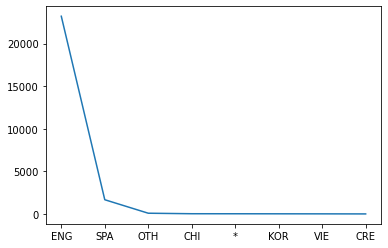

In [11]:
df["lang_spoken_cd"].value_counts().plot();

In [12]:
df.head()
df.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True )

In [13]:
df["lang_spoken_cd"].value_counts()

ENG    23218
SPA     1677
OTH       94
CHI       34
*         30
KOR       25
VIE       20
CRE       12
Name: lang_spoken_cd, dtype: int64

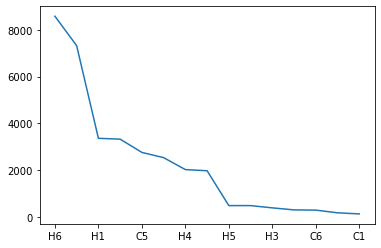

In [14]:
df["mabh_seg"].value_counts().plot();

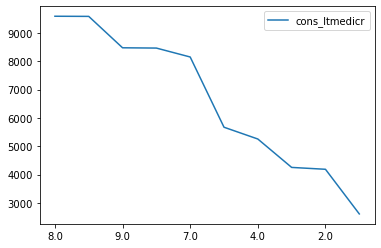

In [15]:

df_value = pd.DataFrame(df["cons_ltmedicr"].dropna().astype(str).value_counts())
df_value.plot()

#pl.bar(df["cons_ltmedicr"],df["cons_ltmedicr"].value_counts());
#df["cons_ltmedicr"].dropna().astype(int).value_counts().sort_values()



In [16]:
df_reduced = df.copy()
df_reduced.shape

#df_reduced = pd.get_dummies(df_reduced)

(97484, 368)

In [17]:
percent = {}
for col in df_reduced:
    # count number of rows with missing values
    n_miss = df_reduced[col].isnull().sum()
    perc = n_miss / df_reduced.shape[0] * 100
    perc = round(perc,2)
    percent[i] = perc
    
    if percent[i] > 20.00:
        df_reduced.drop(col, axis =1, inplace = True)
        
df_reduced.drop("Unnamed: 0.1", axis = 1, inplace = True)



In [18]:
df_reduced.shape

(97484, 341)

In [19]:
#Number of Rows with over 30% missing Values
missing_rows = {}
for row in range(df_reduced.shape[0]):
    miss_row = df_reduced.iloc[row,:].isnull().sum()
    perc_row = miss_row / df_reduced.shape[1] * 100
    perc_row = round(perc_row,2)

    if perc_row > 30:
        missing_rows[row] = [miss_row, perc_row]
    else:
        pass
    



In [20]:
len(missing_rows)

436

In [21]:
len(missing_rows)/df_reduced.shape[0]

0.004472528825243117

In [64]:
#Removing all rows with missing values
df_reducedrows = df_reduced.copy()
df_reducedrows = df_reducedrows.dropna()

    
df_reducedrows.shape

(56068, 341)

In [65]:
df_reducedrows.set_index(["ID"], inplace = True)
df_reducedrows.head()

,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,auth_3mth_acute_ckd,bh_ncal_pmpm_ct,src_div_id,...,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
ID,,,,,,,,,,,,,,,,,,,,,
0M9811Ocb1ST94LY3f5A9I00,0,0.0,0.618606,0.074862,88.272489,36.298252,0.0,0,0.0,000,...,0,0,0.0,33.795298,0.0,0.0,0,Dec_1x-2x,0.0,1.0
aMO5Sfba593T616LYf382AI1,0,0.0,4.016513,0.096272,0.000000,26.716726,0.0,0,0.0,000,...,0,0,0.0,22.941176,0.0,0.0,0,Dec_1x-2x,0.0,1.0
18cM8e1OS1T97LeY85dAaefI,0,0.0,4.621964,0.071283,0.000000,37.255197,0.0,0,0.0,000,...,0,0,0.0,0.844987,0.0,0.0,0,Dec_1x-2x,0.0,1.0
M1O5bd8d7Sa2c1T8LdY9A7I0,0,0.0,5.356763,0.043448,100.000000,76.328619,0.0,0,0.0,000,...,0,0,0.0,15.943290,0.0,0.0,0,Inc_1x-2x,0.0,1.0
a5M05268OSTLdcYc2A1fI9f0,0,0.0,4.168624,0.053011,50.000000,46.617154,0.0,0,0.0,000,...,0,0,0.0,25.783233,0.0,0.0,0,Inc_4x-8x,0.0,1.0


In [66]:
df_reducedrows = df_reducedrows.drop("rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4", axis = 1)

In [67]:
missing_red ={}
for i in range(df_reducedrows.shape[1]):
    # count number of rows with missing values
    n_miss = df_reducedrows.iloc[:,i].isnull().sum()
    perc = n_miss / df_reducedrows.shape[0] * 100
    perc = round(perc,2)
    
    dtype = df_reducedrows.iloc[:,i].dtype
    
    missing_red[i] = [df_reducedrows.columns[i], dtype, n_miss, perc]


In [68]:
missing_val_rev = pd.DataFrame(missing_red)
missing_values_rev =missing_val_rev.T
missing_values_rev = missing_values_rev.rename(columns = {0: "Column Name", 1:"dtype", 2: "Number of Missing Values", 3: "Percent Missing Values"})

In [69]:
missing_values_rev.sort_values(by = 'Percent Missing Values', ascending = False).head(35)


,Column Name,dtype,Number of Missing Values,Percent Missing Values
0,auth_3mth_post_acute_dia,object,0,0.0
223,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4,object,0,0.0
231,rx_tier_1_pmpm_ct_0to3m_b4,float64,0,0.0
230,atlas_povertyunder18pct,float64,0,0.0
229,credit_bal_bankcard_severederog,float64,0,0.0
228,auth_3mth_dc_left_ama,int64,0,0.0
227,atlas_pc_ffrsales12,float64,0,0.0
226,rx_nonbh_pmpm_ct_0to3m_b4,float64,0,0.0
225,auth_3mth_acute,int64,0,0.0
224,rx_nonbh_pmpm_ct_t_9-6-3m_b4,object,0,0.0


In [70]:
df_reducedrows = df_reducedrows.replace("*",0)

In [71]:
#dividing into features and labels
reducedrows = df_reducedrows.copy() 
x_reducedrows= reducedrows.loc[:, reducedrows.columns != 'covid_vaccination']
y_reducedrows = reducedrows['covid_vaccination']
y_reducedrows[1:5]

ID
aMO5Sfba593T616LYf382AI1       vacc
18cM8e1OS1T97LeY85dAaefI    no_vacc
M1O5bd8d7Sa2c1T8LdY9A7I0    no_vacc
a5M05268OSTLdcYc2A1fI9f0    no_vacc
Name: covid_vaccination, dtype: object

In [83]:
y = y_reducedrows.copy()


In [84]:
x = x_reducedrows.copy()
x = pd.get_dummies(x)
x.shape

(56068, 1065)

In [85]:
x = x.to_numpy()

In [86]:
##Simple imputing.
#imputer = SimpleImputer()
#imputer.fit(x)

SimpleImputer()

In [87]:
#imputer.transform(x)

array([[0.        , 0.61860601, 0.07486189, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 4.01651326, 0.09627232, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 4.62196388, 0.07128285, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 5.35136682, 0.07700327, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 3.69777412, 0.017803  , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 3.64333754, 0.09702022, ..., 0.        , 1.        ,
        0.        ]])

In [88]:
# Feature selection with Boruta
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(x, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1065
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	9 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	10 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	11 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	12 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	13 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	14 / 100
Confirmed: 	124
Tentative: 	42
Rejected: 	899
Iteration: 	15 / 100
Confirmed: 	124
Tentative: 	39
Rejected: 	902
Iteration: 	16 / 1

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=326, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1FF5178F040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1FF5178F040, verbose=2)

In [89]:
# check selected features - first 5 features are selected
feat_selector.support_

array([False, False,  True, ..., False, False, False])

In [95]:
# check ranking of features
feat_selector.ranking_[0:126]

array([ 65,  43,   1,  63,   1, 794, 249, 794,   1,   1,  48,   3,   1,
         1,  15,  72,  73,   1,  30,   1,   1, 414,   1, 218,   8,  94,
       794, 794,   1,   1,   1,   3, 794, 794,  45,   1, 794,   1,   1,
       794,   1,  79, 794, 794,  64,   1, 794,   1,   1, 794,   1,   1,
         1,   1,  10,   1,   1,   1,   1, 794,  10,  74,   1,   1,  66,
         1,   1,   1, 137, 794,   1,   1,   1,   1, 198, 794,   1,   1,
        49,   1, 541,  21, 123,  24, 794, 794,  70, 794, 794,   1, 794,
       163,   1,  40, 794, 794, 108,   1,   1,   1, 106,   1,  17,  13,
         1,   1, 156,   1,   1,   1,   1, 794,   1,  60,   1,   2,   1,
         1,   1,  44, 794,  27,   1,   1,   1,   1])

In [91]:
# call transform() on X to filter it down to selected features
x_filtered = feat_selector.transform(x)

In [92]:
x_filtered

array([[7.48618930e-02, 3.62982523e+01, 2.08075582e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.62723160e-02, 2.67167264e+01, 1.88970705e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.12828470e-02, 3.72551974e+01, 1.53640622e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.70032670e-02, 5.73352944e+01, 1.65263691e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.78030000e-02, 7.02438835e+01, 1.78429036e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.70202220e-02, 3.99462465e+01, 1.00593120e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])